In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/AAPL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-06,208.000000,209.250000,207.070007,209.070007,205.935257,25425400
1,2018-08-07,209.320007,209.500000,206.759995,207.110001,204.004639,25587400
2,2018-08-08,206.050003,207.809998,204.520004,207.250000,204.142532,22525500
3,2018-08-09,209.529999,209.779999,207.199997,208.880005,205.748108,23492600
4,2018-08-10,207.360001,209.100006,206.669998,207.529999,205.135254,24611200


In [4]:
preprocess = data[['Date', 'Close']]
preprocess.Date = pd.to_datetime(preprocess.Date)

In [5]:
preprocess = preprocess.set_index('Date')

In [6]:
preprocess.head()

,Close
Date,
2018-08-06,209.070007
2018-08-07,207.110001
2018-08-08,207.250000
2018-08-09,208.880005
2018-08-10,207.529999


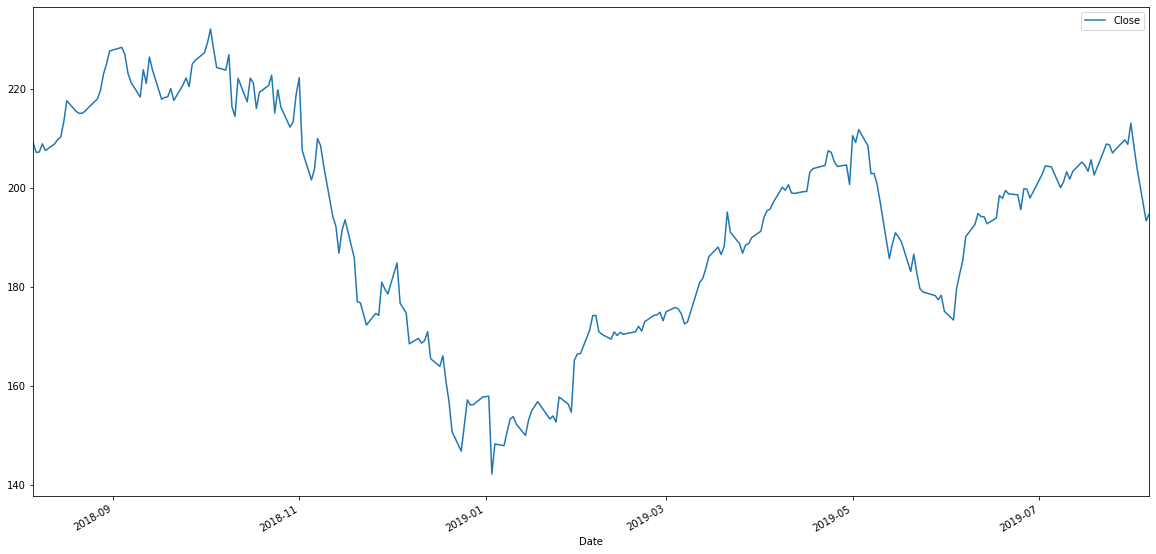

In [7]:
preprocess.plot(figsize=(20,10))

# Decomposition 

<Figure size 1440x720 with 0 Axes>

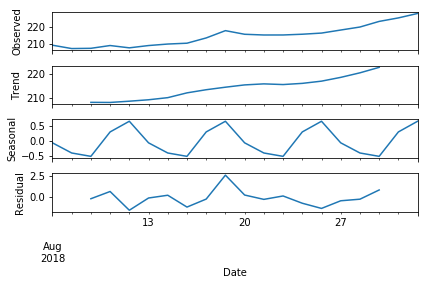

In [8]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(preprocess[:20], model='additive')
plt.figure(figsize=(20,10))
decompostion.plot()
plt.show()

## Fourier Transformation 

In [9]:
fourier_transform = np.fft.fft(np.array(preprocess.Close.tolist()))
fourier_df = pd.DataFrame({'Fourier': fourier_transform})
fourier_df['Absolute'] = fourier_df.Fourier.apply(lambda x: np.abs(x))
fourier_df['Angle'] = fourier_df.Fourier.apply(lambda x: np.angle(x))

In [10]:
fourier_df.head()

,Fourier,Absolute,Angle
0,(48668.980066+0j),48668.980066,0.000000
1,(2976.974918004424-328.06356283643004j),2994.996722,-0.109757
2,(-912.4959758515039-1975.1329567465054j),2175.729556,-2.003578
3,(67.17134533571598+428.7817105365837j),434.011227,1.415403
4,(206.5657228785099+419.286160822857j),467.408047,1.113038


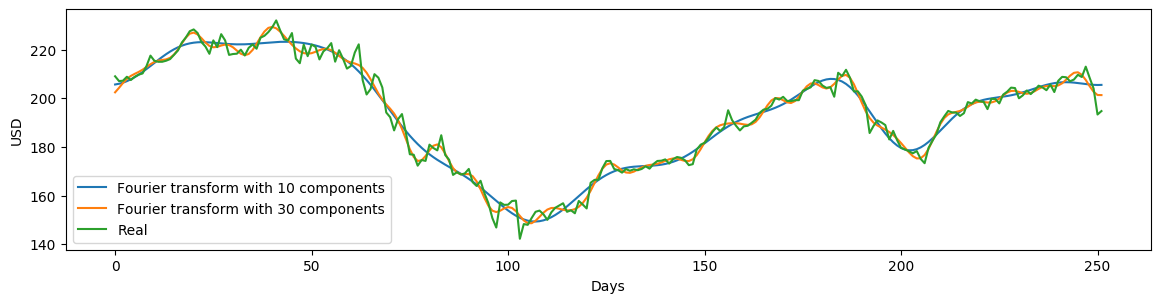

In [11]:
plt.figure(figsize=(14, 7), dpi=100)
plt.subplot(2,1,1)
fft_list = np.asarray(fourier_df['Fourier'].tolist())
for num_ in [10,30]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
#     print(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
# plt.title('Figure 3: Apple Inc(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

## ARIMA 

In [12]:
from statsmodels.tsa.arima_model import ARIMA

p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))

season_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p,d,q))] 

In [13]:
season_pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [14]:
warnings.filterwarnings("ignore")
param = []
for i in pdq:
    try:
        model = ARIMA(preprocess, order=i)
        model_fit = model.fit()
        print(i, model_fit.aic)
        param.append(i, model_fit.aic)
    except:
        continue
        
        

(0, 0, 0) 2272.064233402328
(0, 0, 1) 1978.896741717569
(0, 0, 2) 1792.9937267908126
(0, 0, 3) 1684.39994521078
(0, 0, 4) 1617.8263353792881
(0, 1, 0) 1369.344603207631
(0, 1, 1) 1371.0599963520417
(0, 1, 2) 1372.4644460650093
(0, 1, 3) 1374.3341995679034
(0, 1, 4) 1376.3043050883084
(0, 2, 0) 1545.8703525425035
(0, 2, 1) 1372.153685612705
(1, 0, 0) 1377.7732706732327
(1, 0, 1) 1379.5969868608468
(1, 0, 2) 1381.1492759167866
(1, 0, 3) 1383.0660828069063
(1, 0, 4) 1385.0173557977878
(1, 1, 0) 1371.0870193719613
(1, 2, 0) 1477.6143201812076
(1, 2, 1) 1373.9428062566337
(1, 2, 2) 1375.606557477065
(1, 2, 3) 1377.322989330963
(2, 0, 0) 1379.611782336482
(2, 0, 1) 1381.3594663168046
(2, 0, 2) 1383.1097018698192
(2, 0, 3) 1385.0605732526978
(2, 0, 4) 1376.2037154485442
(2, 1, 0) 1372.5150063328779
(2, 1, 1) 1374.3585191809993
(2, 2, 0) 1448.2177390275838
(2, 2, 1) 1375.317186045179
(2, 2, 2) 1377.3889283861436
(2, 2, 3) 1375.120194487346
(2, 2, 4) 1375.533311084922
(3, 0, 0) 1381.17486780213

In [15]:
model = ARIMA(preprocess, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -682.672
Method:                           css   S.D. of innovations              3.672
Date:                Thu, 08 Aug 2019   AIC                           1369.345
Time:                        20:17:31   BIC                           1376.396
Sample:                             1   HQIC                          1372.182
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0570      0.232     -0.246      0.806      -0.511       0.397


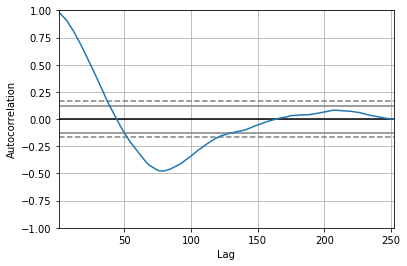

<Figure size 800x560 with 0 Axes>

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(preprocess)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

<Figure size 1440x720 with 0 Axes>

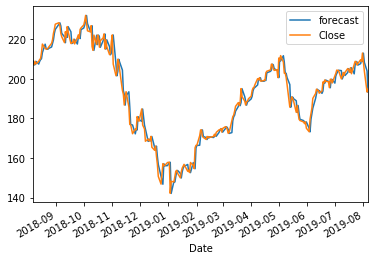

In [17]:
plt.figure(figsize=(20,10))
model_fit.plot_predict()
plt.show()

In [18]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

param = []
X = preprocess.Close.values
size = int(len(X) * 0.4)
train, test = X[0:150], X[150:]

history = [x for x in train]
predictions = []
for i,j in zip(range(len(test)), pdq):
    
    try:
        model = ARIMA(preprocess, order=j)
        model_fit = model.fit()
        print(i,j, model_fit.aic)

    except:
        continue
        
    model = ARIMA(preprocess, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)

0 (0, 0, 0) 2272.064233402328
1 (0, 0, 1) 1978.896741717569
2 (0, 0, 2) 1792.9937267908126
3 (0, 0, 3) 1684.39994521078
4 (0, 0, 4) 1617.8263353792881
5 (0, 1, 0) 1369.344603207631
6 (0, 1, 1) 1371.0599963520417
7 (0, 1, 2) 1372.4644460650093
8 (0, 1, 3) 1374.3341995679034
9 (0, 1, 4) 1376.3043050883084
10 (0, 2, 0) 1545.8703525425035
11 (0, 2, 1) 1372.153685612705
25 (1, 0, 0) 1377.7732706732327
26 (1, 0, 1) 1379.5969868608468
27 (1, 0, 2) 1381.1492759167866
28 (1, 0, 3) 1383.0660828069063
29 (1, 0, 4) 1385.0173557977878
30 (1, 1, 0) 1371.0870193719613
35 (1, 2, 0) 1477.6143201812076
36 (1, 2, 1) 1373.9428062566337
37 (1, 2, 2) 1375.606557477065
38 (1, 2, 3) 1377.322989330963
50 (2, 0, 0) 1379.611782336482
51 (2, 0, 1) 1381.3594663168046
52 (2, 0, 2) 1383.1097018698192
53 (2, 0, 3) 1385.0605732526978
54 (2, 0, 4) 1376.2037154485442
55 (2, 1, 0) 1372.5150063328779
56 (2, 1, 1) 1374.3585191809993
60 (2, 2, 0) 1448.2177390275838
61 (2, 2, 1) 1375.317186045179
62 (2, 2, 2) 1377.3889283861

In [19]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = preprocess.Close.values
size = int(len(X) * 0.4)
train, test = X[0:90], X[90:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [20]:
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % (error))

Test RMSE: 12.791


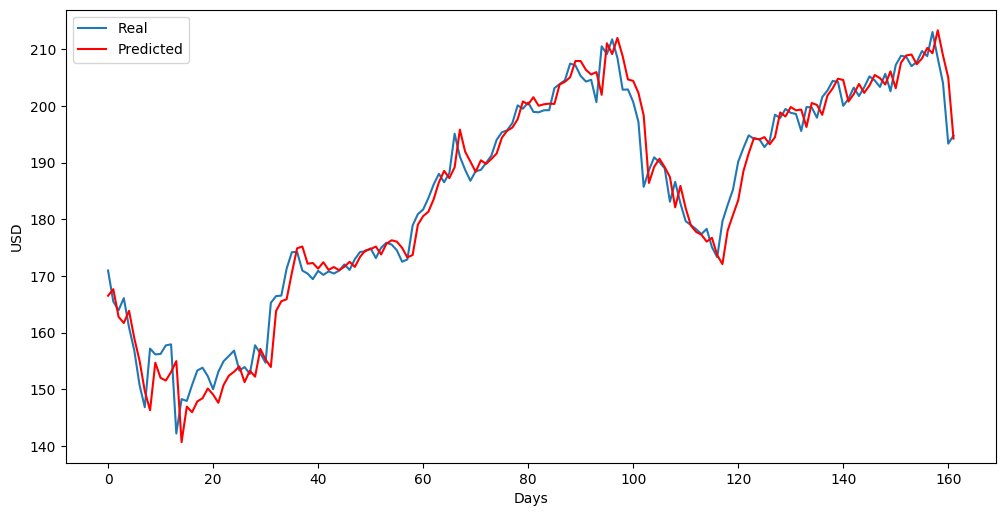

In [21]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
# plt.title('Figure 5: ARIMA model on Apple Inc stock')
plt.legend()
plt.show()

In [22]:
for i in pdq:
    for j in season_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
            preprocess.Close, order = i, 
            seasonal_order = j,
            enforce_stationarity = False,
            enforce_invertibility = False)
            result = mod.fit()
            print(result.aic)
        except:
            continue

In [23]:
mod = sm.tsa.statespace.SARIMAX(preprocess.Close,
                               order=(4,1,0),
                               seasonal_order=(4,1,0,12),
                               enforce_invertibility=False, 
                               enforce_stationarity=False)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(4, 1, 0)x(4, 1, 0, 12)   Log Likelihood                -523.002
Date:                            Thu, 08 Aug 2019   AIC                           1064.003
Time:                                    20:18:27   BIC                           1093.083
Sample:                                         0   HQIC                          1075.787
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0073      0.077     -0.095      0.925      -0.159       0.144
ar.L2          0.0308      0.091      0.340      0.734      -0.147       0.208
ar.L3         -0.1084      0.065     -1.667      0.096      -0.236       0.019
ar.L4         -0.0063      0.077     -0.082      0.935      -0.157       0.145
ar.S.L12      -0.6806      0.076     -8.976      0.000      -0.829      -0.532
ar.S.L24      -0.5566      0.074     -7.476      0.000      -0.703      -0.411
ar.S.L36      -0.4261      0.077     -5.506      0.000      -0.578      -0.274
ar.S.L48      -0.2364      0.078     -3.043      0.002      -0.389      -0.084
sigma2        15.7324      1.353     11.627      0.000      13.080      18.384
===================================================================================
Ljung-Box (Q):                       40.89   Jarque-Bera (JB):                14.95
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

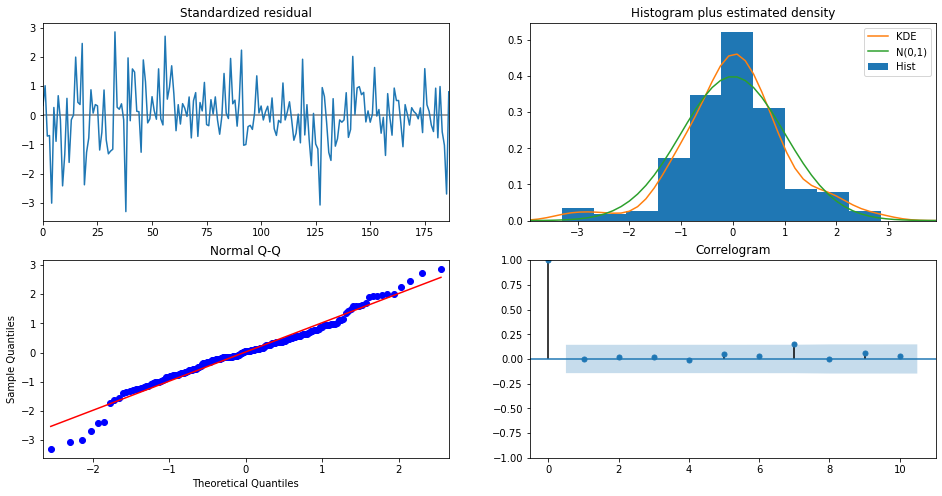

In [24]:
result.plot_diagnostics(figsize =(16,8))
plt.show()

In [25]:
preprocess.tail()

,Close
Date,
2019-07-31,213.039993
2019-08-01,208.429993
2019-08-02,204.020004
2019-08-05,193.339996
2019-08-06,194.759995


In [27]:
pred = result.forecasts

In [34]:
date_pred = pd.date_range('2019-08-06', periods = 252, freq ='D')

In [35]:
prediction_df = pd.DataFrame({'prediction':pred[0], 'Dates':date_pred})

In [36]:
prediction_df = prediction_df.set_index('Dates')

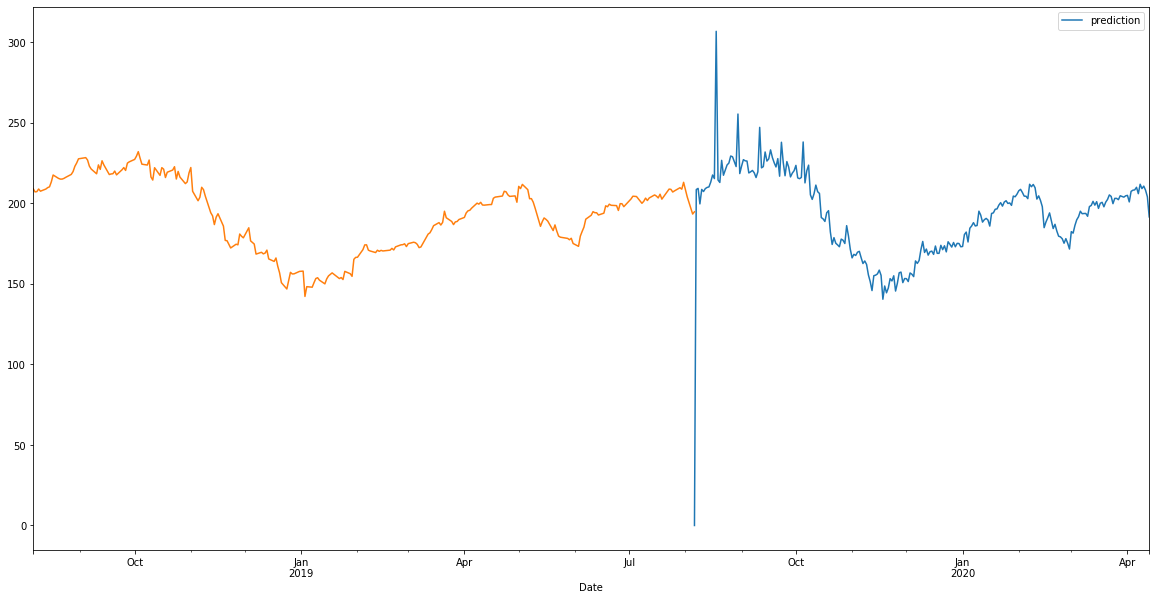

In [37]:
prediction_df.plot(figsize=(20,10))
preprocess.Close.plot(label = 'observed')

In [38]:
print('Root Mean Square Error:',np.sqrt((prediction_df.prediction - preprocess.Close)**2).mean())

Root Mean Square Error: 194.759995


In [39]:
preprocess.head()

,Close
Date,
2018-08-06,209.070007
2018-08-07,207.110001
2018-08-08,207.250000
2018-08-09,208.880005
2018-08-10,207.529999
